# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy.

**Details of the competition can be found [here](https://www.kaggle.com/c/titanic)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Pre-processing

In [6]:
train_df.drop(['Ticket', 'Fare', 'Cabin', 'PassengerId', 'Embarked'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Fare', 'Cabin', 'PassengerId', 'Embarked'], axis=1, inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0


In [7]:
for dataset in combine:
    #catagorial to ordinal for gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    #NaN replacement
    dataset['Age'].fillna(0, inplace = True)
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0
5,0,3,"Moran, Mr. James",0,0.0,0,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0


In [8]:
for dataset in combine:
    #new Title feature for model training.
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #replace less frequent titles with a common name
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
## Importance of Title on the dataset.
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [9]:
## We can now drop the 'Name' column
train_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 7), (418, 6))

In [10]:
train_df.columns.values, test_df.columns.values

(array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Title'], dtype=object),
 array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Title'], dtype=object))

In [11]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,22.0,1,0,Mr
1,1,1,1,38.0,1,0,Mrs
2,1,3,1,26.0,0,0,Miss
3,1,1,1,35.0,1,0,Mrs
4,0,3,0,35.0,0,0,Mr
5,0,3,0,0.0,0,0,Mr
6,0,1,0,54.0,0,0,Mr
7,0,3,0,2.0,3,1,Master
8,1,3,1,27.0,0,2,Mrs
9,1,2,1,14.0,1,0,Mrs


In [12]:
train_df.groupby(['Title']).count()

,Survived,Pclass,Sex,Age,SibSp,Parch
Title,,,,,,
Master,40,40,40,40,40,40
Miss,185,185,185,185,185,185
Mr,517,517,517,517,517,517
Mrs,126,126,126,126,126,126
Rare,23,23,23,23,23,23


In [13]:
## Filling missing values of age, logically.
for df in combine:
    mr = df[(df['Title'].str.contains('Mr')) & (df.Age != 0)].Age.mode()
    df.loc[((df['Title'].str.contains('Mr')) & (df.Age == 0)),'Age'] = mr[0]
    mrs = df[(df['Title'].str.contains('Mrs')) & (df.Age != 0)].Age.mode()
    df.loc[((df['Title'].str.contains('Mrs')) & (df.Age == 0)),'Age'] = mrs[0]
    miss = df[(df['Title'].str.contains('Miss')) & (df.Age != 0)].Age.mode()
    df.loc[((df['Title'].str.contains('Miss')) & (df.Age == 0)),'Age'] = miss[0]
    mas = df[(df['Title'].str.contains('Master')) & (df.Age != 0)].Age.mode()
    df.loc[((df['Title'].str.contains('Master')) & (df.Age == 0)),'Age'] = mas[0]
    rr = df[(df['Title'].str.contains('Rare')) & (df.Age != 0)].Age.mode()
    df.loc[((df['Title'].str.contains('Rare')) & (df.Age == 0)),'Age'] = rr[0]
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,22.0,1,0,Mr
1,1,1,1,38.0,1,0,Mrs
2,1,3,1,26.0,0,0,Miss
3,1,1,1,35.0,1,0,Mrs
4,0,3,0,35.0,0,0,Mr
5,0,3,0,24.0,0,0,Mr
6,0,1,0,54.0,0,0,Mr
7,0,3,0,2.0,3,1,Master
8,1,3,1,27.0,0,2,Mrs
9,1,2,1,14.0,1,0,Mrs


In [14]:
## Dropping the Title column as it is not required anymore, (title is now reflected in all ages)
for df in combine:
    df.drop('Title', axis=1, inplace=True)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
5,0,3,0,24.0,0,0
6,0,1,0,54.0,0,0
7,0,3,0,2.0,3,1
8,1,3,1,27.0,0,2
9,1,2,1,14.0,1,0


In [15]:
train_df.shape, test_df.shape #checking the processes so far are consistent

((891, 6), (418, 5))

In [16]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.copy()

In [17]:
sol = pd.read_csv('./gender_submission.csv') #solution file for comparison
sol.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
y_test = sol["Survived"]

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 5), (891,), (418, 5), (418,))

# Model, Prediction and comparison.


In [20]:
# visualization
import seaborn as sns #copied method from internet for better visualisation.
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

D:\Programs\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
## To save score of each model used
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)


In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

79.900000000000006

In [23]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)
acc_rfc = round(rfc.score(X_train, y_train) * 100, 2)
acc_rfc

91.689999999999998

In [24]:
xgb_ = XGBClassifier()
xgb_.fit(X_train, y_train)
acc_xgb = round(xgb_.score(X_test, y_test) * 100, 2)
acc_xgb

89.950000000000003

In [25]:
clc1 = LinearSVC(random_state = 2)
clc1.fit(X_train, y_train)
acc_c1 = round(clc1.score(X_test, y_test) * 100, 2)
acc_c1


93.540000000000006

In [26]:
clc2 = SVC(random_state = 0)
clc2.fit(X_train, y_train)
acc_c2 = round(clc2.score(X_test, y_test) * 100, 2)
acc_c2

86.599999999999994

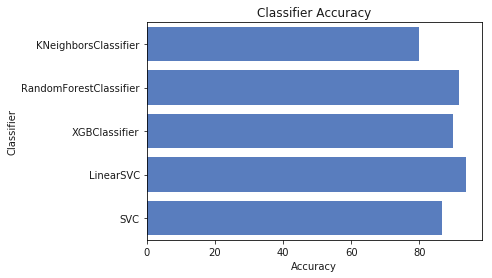

In [27]:
acc_dict = {'KNeighborsClassifier':acc_knn,'RandomForestClassifier': acc_rfc, 'XGBClassifier':acc_xgb, 'LinearSVC':acc_c1, 'SVC':acc_c2}

for clf in acc_dict:
    #acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Clearly, **Linear Support Vector Classification** has out-performed, but pre-processing is an important factor for a model's accuracy. 

Teams have comeup with solutions that give 100% accuracy. Feel free to give inputs on this one :)